# Census Income

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [4]:
!pip install imbalanced-learn

In [5]:
#importing Train dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32560, 15)

# Exploratory Data Analysis

#### Prediction task: Classify whether an idividual's income exceeds 50,000 dollars a year

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
#checking for duplicate values

df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

<AxesSubplot:>

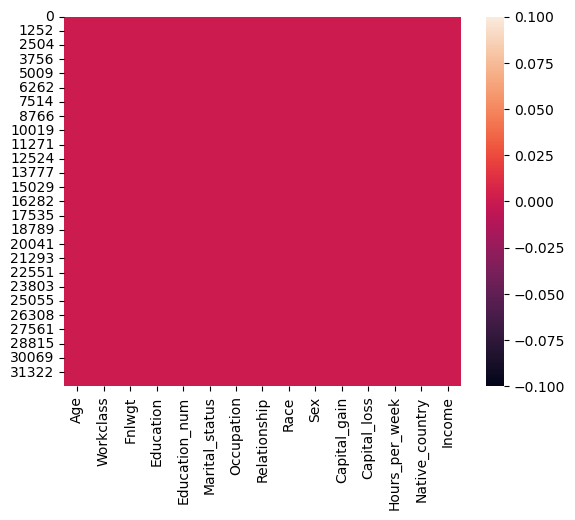

In [10]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

In [11]:
df1=df.copy()
                       
df1                   

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
#Since column Capital gain and Capital loss has '0' integer values, we will drop them from the table.

df1.drop(columns=['Capital_gain', 'Capital_loss','Relationship'],axis=1,inplace=True)

In [13]:
#Lets rename the columns

df1.rename(columns={'Fnlwgt':'Final_wgt'},inplace=True)

df1=df1.rename(columns={'Hours_per_week':'HrsWk'})


In [14]:
df1

,Age,Workclass,Final_wgt,Education,Education_num,Marital_status,Occupation,Race,Sex,HrsWk,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [15]:
#Remove the extra entries:

#df1 = df1[(df1['Age'] > 16) & (df1['Income'] > 100) & (df1['HrsWk'] > 0)]

In [16]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]!="int64":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]=="int64":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)



categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Race', 'Sex', 'Native_country', 'Income']
Numerical Columns: ['Age', 'Final_wgt', 'Education_num', 'HrsWk']


In [17]:
#checking the value counts of each column

for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Final_wgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dt

# Data Visualization

#Since the income column >50 or <50 depends on the Final weight which depends on age,race,sex, we will visualize univariate graphs

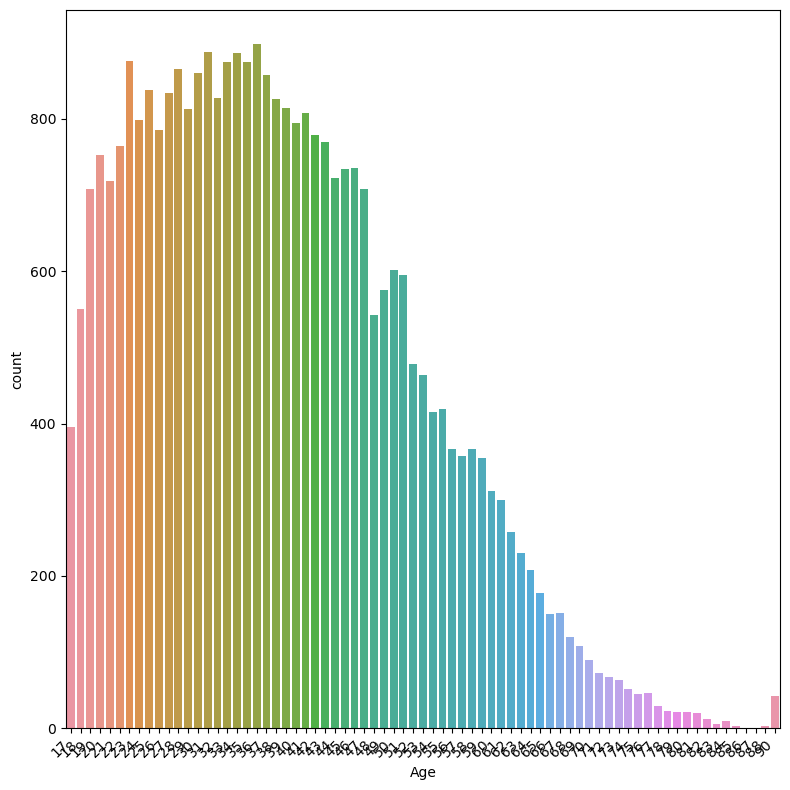

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


In [18]:
#visualize the number of age column

plt.figure(figsize=(8,8))
ax=sns.countplot(x= 'Age',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  
plt.show()
print(df1['Age'].value_counts())


 Male      21774
 Female    10762
Name: Sex, dtype: int64


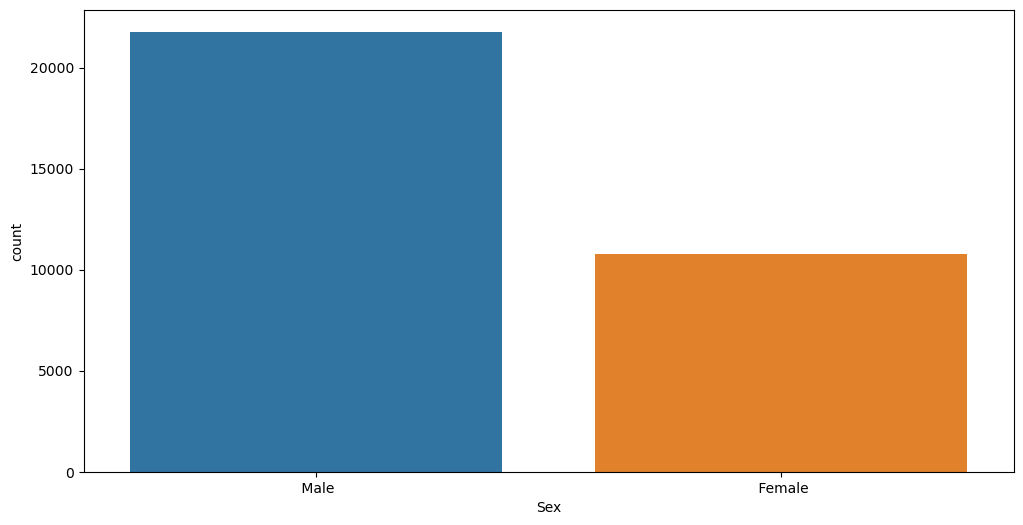

In [19]:
#visualize the number of sex column

plt.figure(figsize=(12,6))
ax=sns.countplot(x= 'Sex',data=df1)
print(df1['Sex'].value_counts())


 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


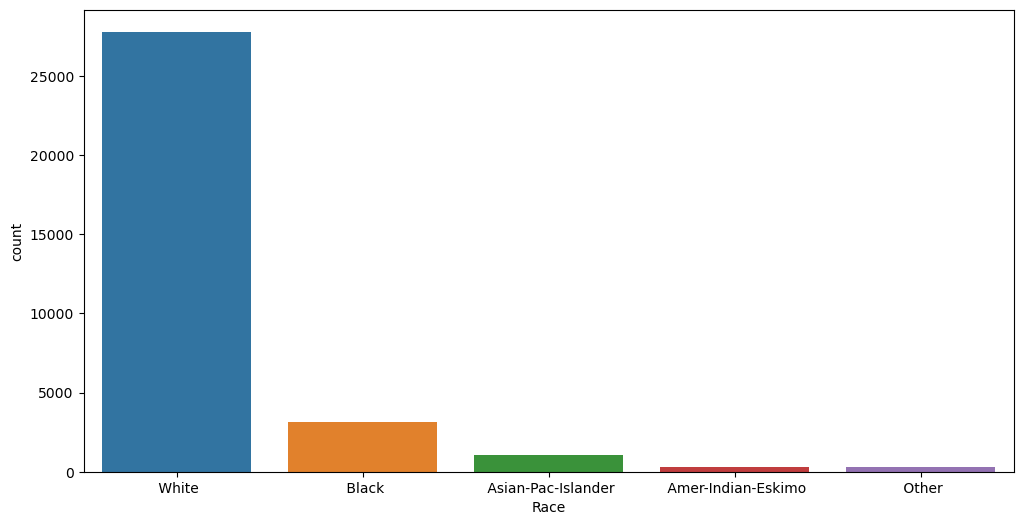

In [20]:
#visualize the number of race column

plt.figure(figsize=(12,6))
ax=sns.countplot(x= 'Race',data=df1)
print(df1['Race'].value_counts())


 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


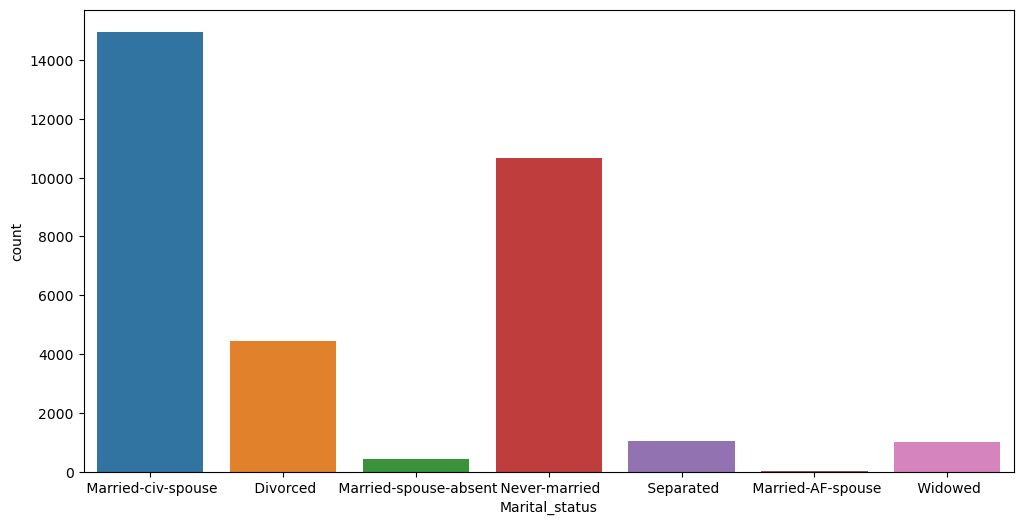

In [21]:
#visualize the number of marital_status column

plt.figure(figsize=(12,6))
ax=sns.countplot(x= 'Marital_status',data=df1)
print(df1['Marital_status'].value_counts())



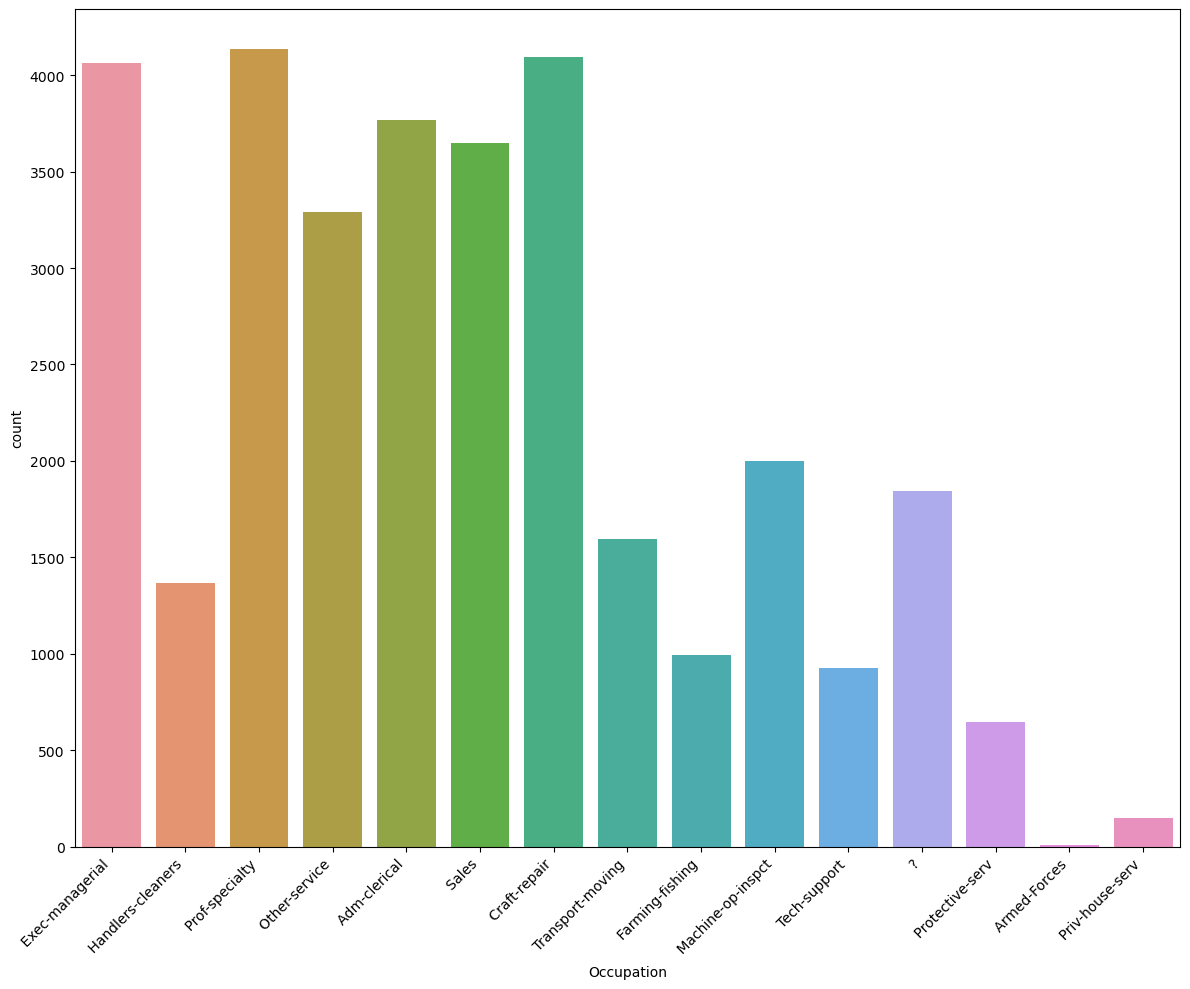

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


In [22]:
#visualize the number of occupation column

plt.figure(figsize=(12,10))
ax=sns.countplot(x= 'Occupation',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(df1['Occupation'].value_counts())


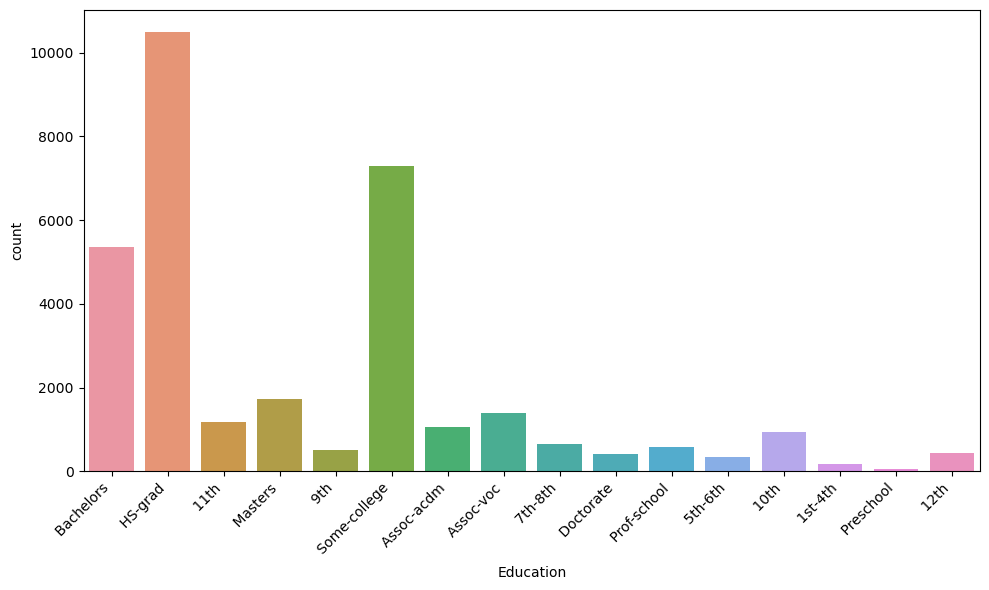

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


In [23]:
#visualize the number of Relationship column

plt.figure(figsize=(10,6))
ax=sns.countplot(x= 'Education',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(df1['Education'].value_counts())


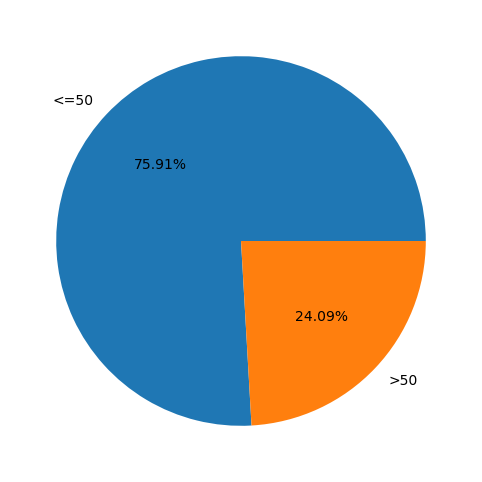

In [24]:
#visualize the count of the type of income 


labels='<=50','>50'
fig, ax =plt.subplots(figsize=(10,6))
ax.pie(df1["Income"].value_counts(),labels=labels,autopct='%1.2f%%')
plt.show()


Looking at the pie chart only 24.09% people have >50K income

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


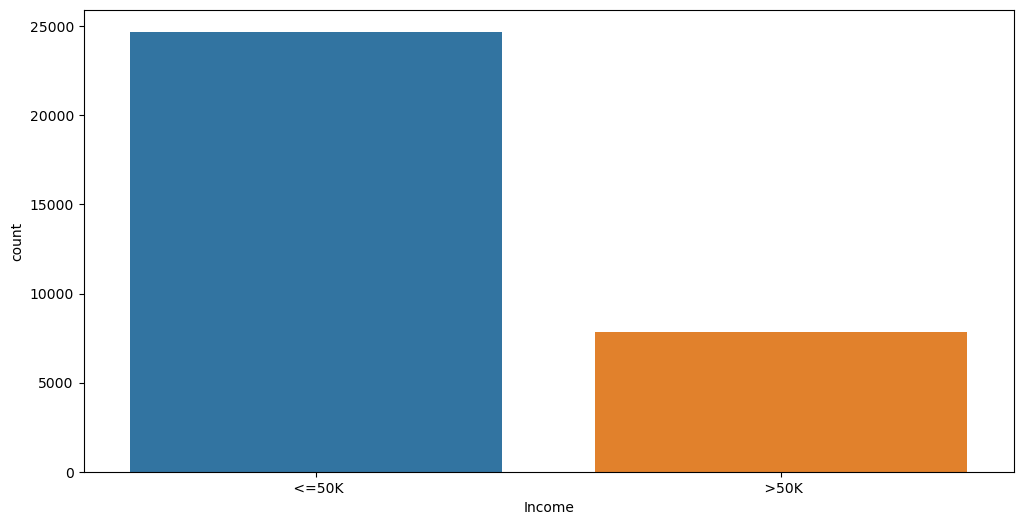

In [25]:
#visualize the number of income column

plt.figure(figsize=(12,6))
ax=sns.countplot(x= 'Income',data=df1)
print(df1['Income'].value_counts())


In [26]:
#ordinal_mapping = {'<=50K': 0, '>50K': 1}

# Apply ordinal encoding using the defined mapping

#df1['Income_encoded'] = df1['Income'].map(ordinal_mapping)

#print(df1)

## Bivariate Graph 

<AxesSubplot:title={'center':'Comparision between Final_wgt and Age'}, xlabel='Final_wgt', ylabel='Age'>

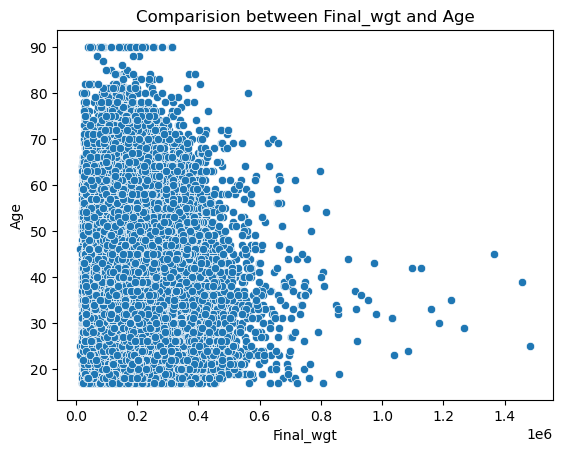

In [27]:
#when we are comparing two data plot:

plt.title("Comparision between Final_wgt and Age")
sns.scatterplot(x="Final_wgt", y = "Age",data = df1)


<AxesSubplot:title={'center':'Comparision between Final_wgt and income'}, xlabel='Income', ylabel='Final_wgt'>

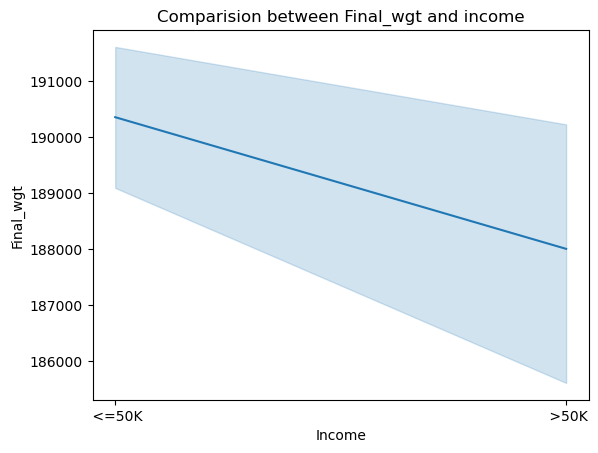

In [28]:
#when we are comparing two data plot:

plt.title("Comparision between Final_wgt and income")
sns.lineplot(x="Income", y = "Final_wgt",data = df1)


In [29]:
df2=df1.copy

In [30]:
#changing categorical columns into encoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_col:
    df1[col] = label_encoder.fit_transform(df1[col])

print(df1)



       Age  Workclass  Final_wgt  Education  Education_num  Marital_status  \
0       50          6      83311          9             13               2   
1       38          4     215646         11              9               0   
2       53          4     234721          1              7               2   
3       28          4     338409          9             13               2   
4       37          4     284582         12             14               2   
...    ...        ...        ...        ...            ...             ...   
32555   27          4     257302          7             12               2   
32556   40          4     154374         11              9               2   
32557   58          4     151910         11              9               6   
32558   22          4     201490         11              9               4   
32559   52          5     287927         11              9               2   

       Occupation  Race  Sex  HrsWk  Native_country  Income  
0

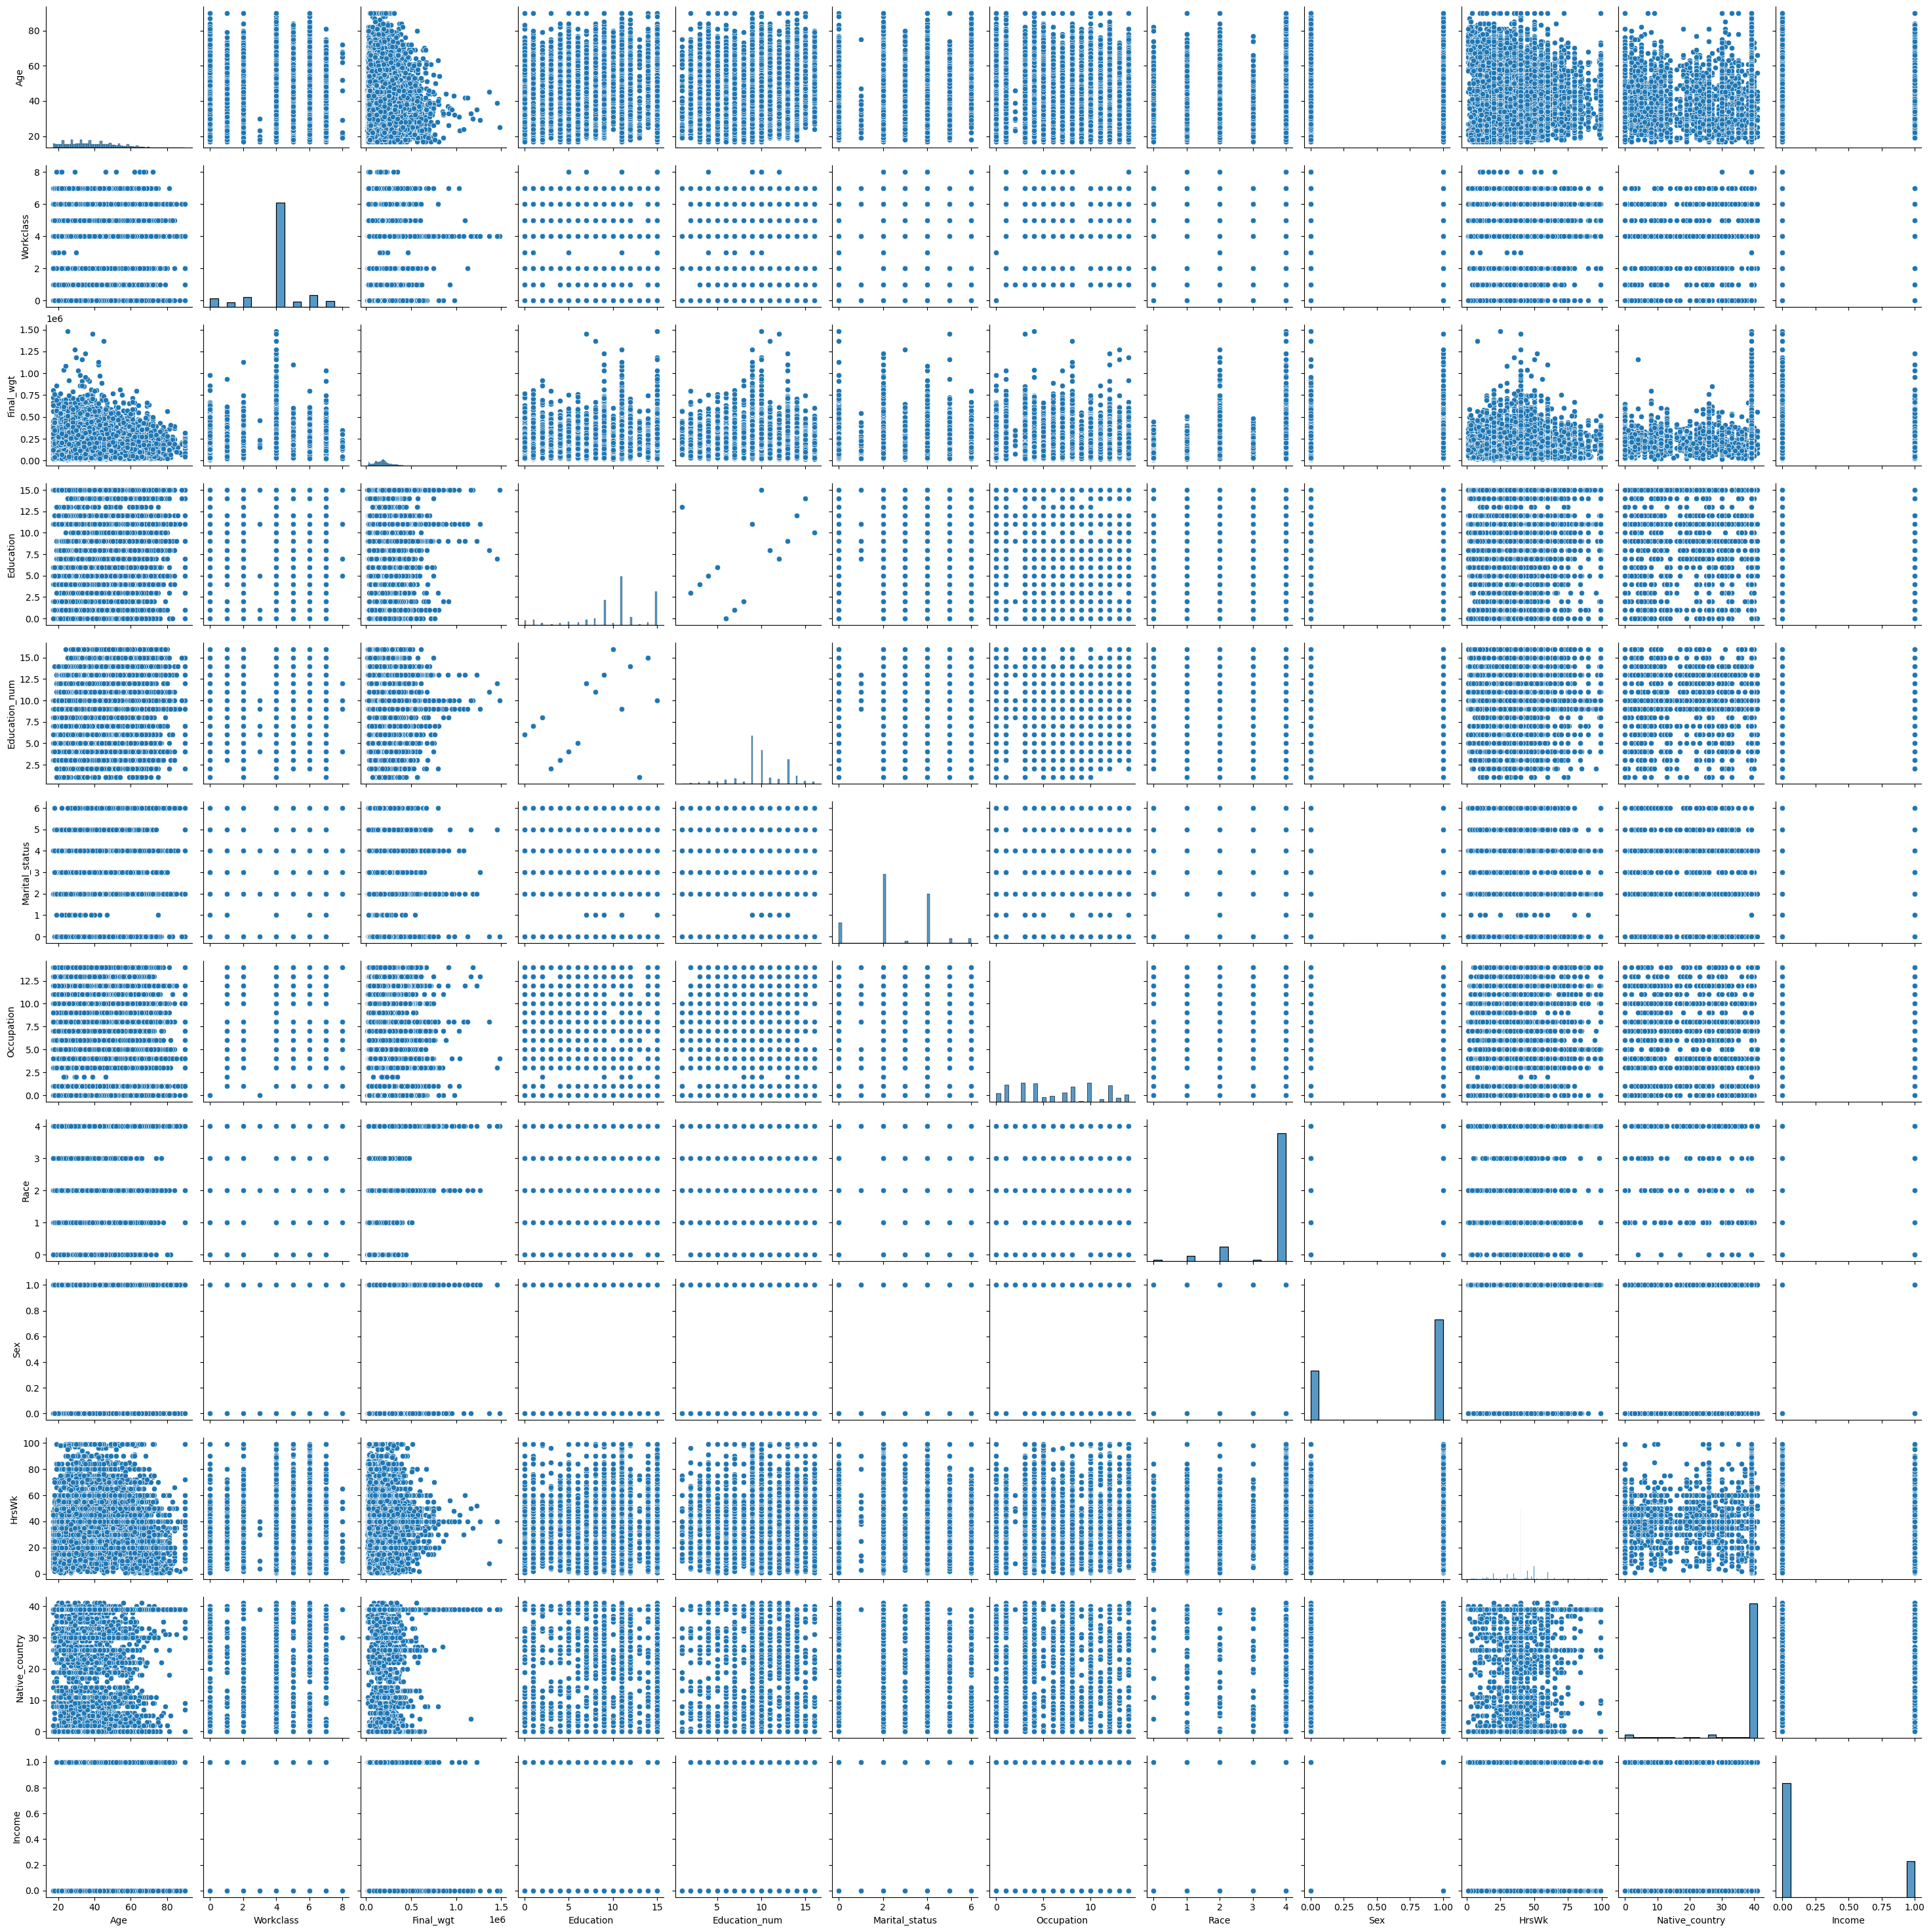

In [31]:
sns.pairplot(df1)

<AxesSubplot:xlabel='Income', ylabel='Density'>

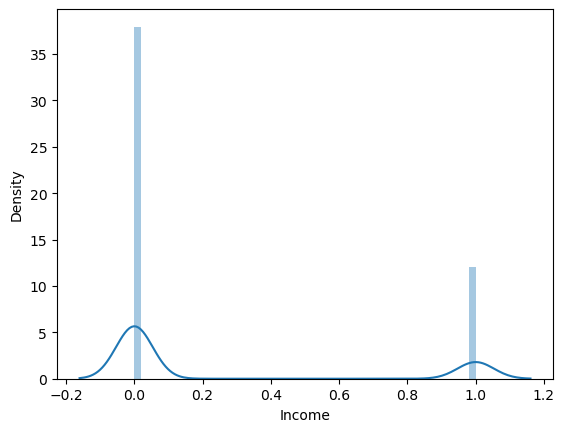

In [32]:
#Analyze the Target variable

sns.distplot(df1.Income)

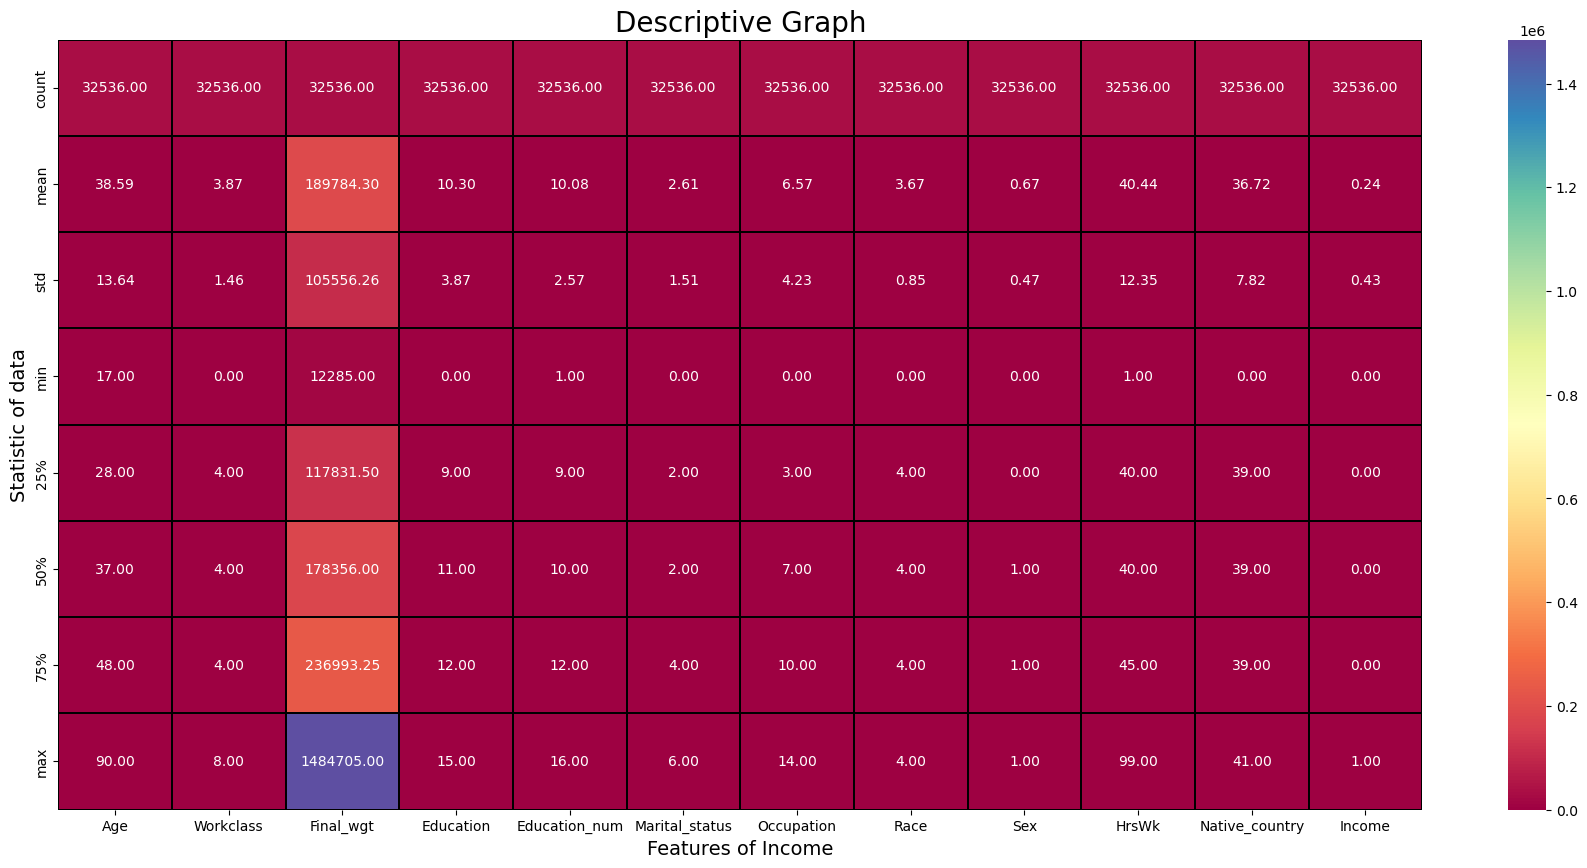

In [33]:
#Descriptive Graph of features and target variable of the team 

plt.figure(figsize=(22,10))
sns.heatmap(df1.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Features of Income',fontsize=14)
plt.ylabel('Statistic of data',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()


<AxesSubplot:>

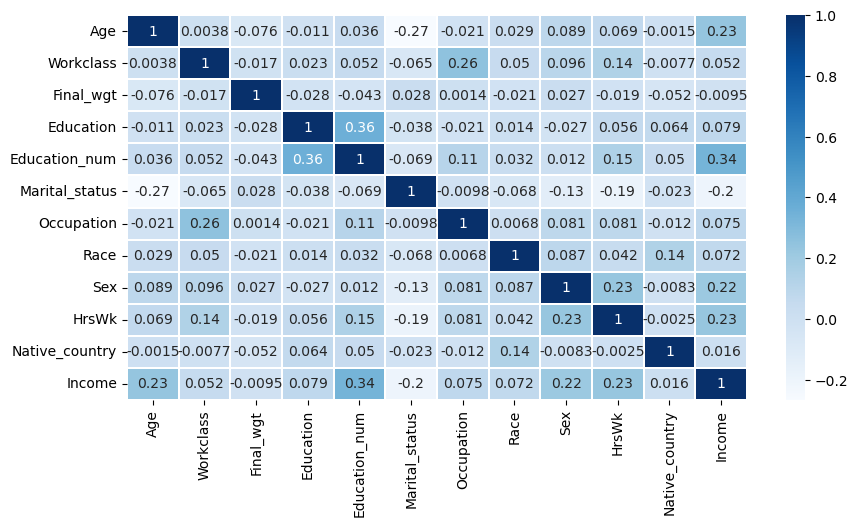

In [34]:
#Correlation map to display the most correlated variables:

cor = df1.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(df1.corr(),cmap="Blues",annot=True, ax= ax,linewidth=.25)

we see high corelation of Age, Education_num, sex, HrsWk and less corelation wth Final_wgt

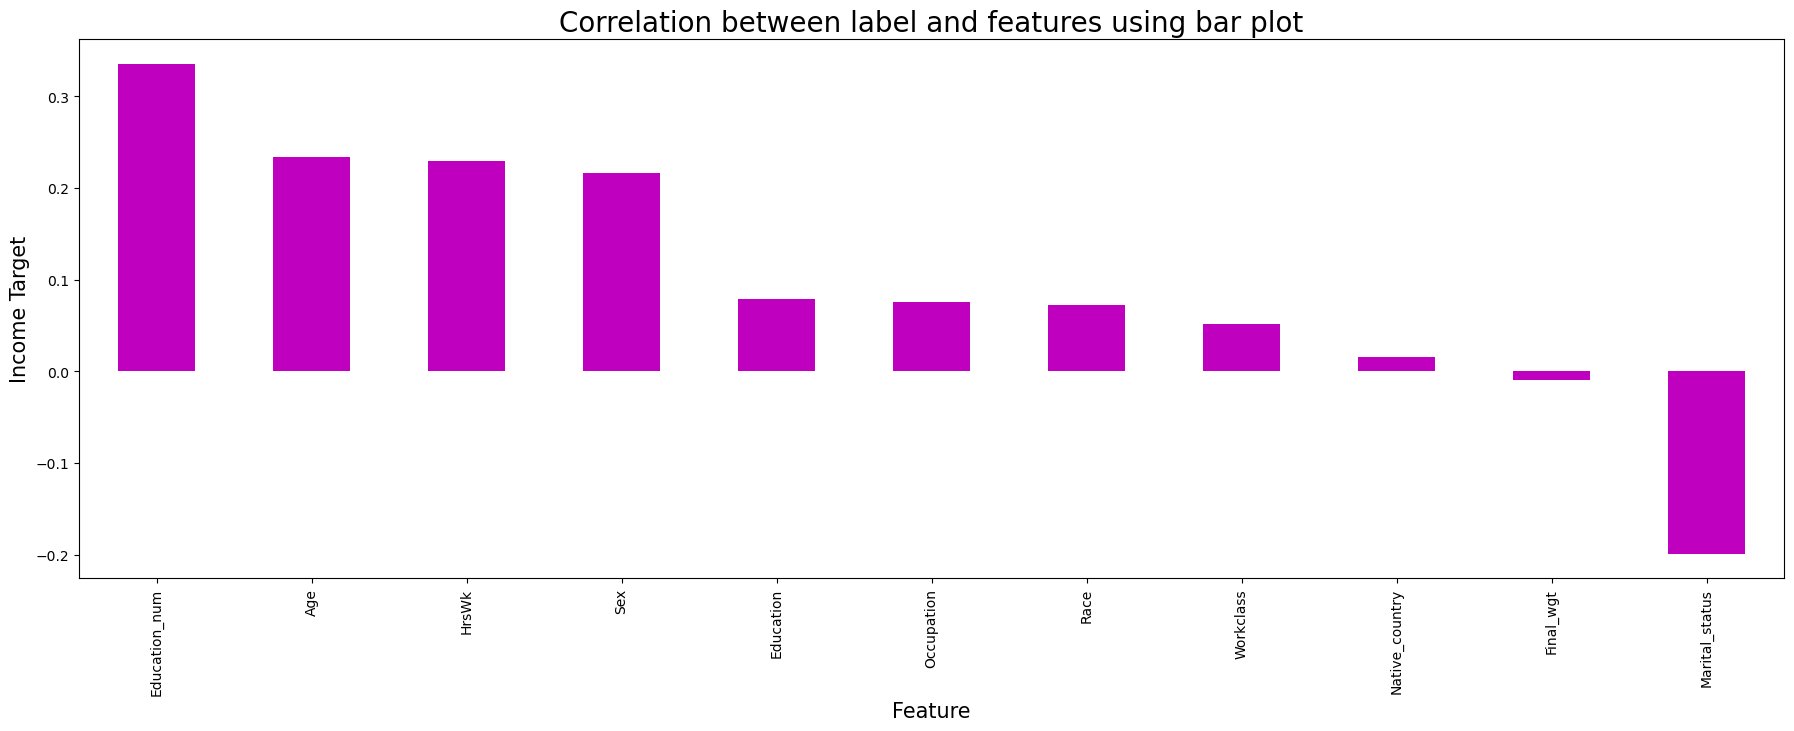

In [35]:
plt.figure(figsize = (22,7))
df1.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Income Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()

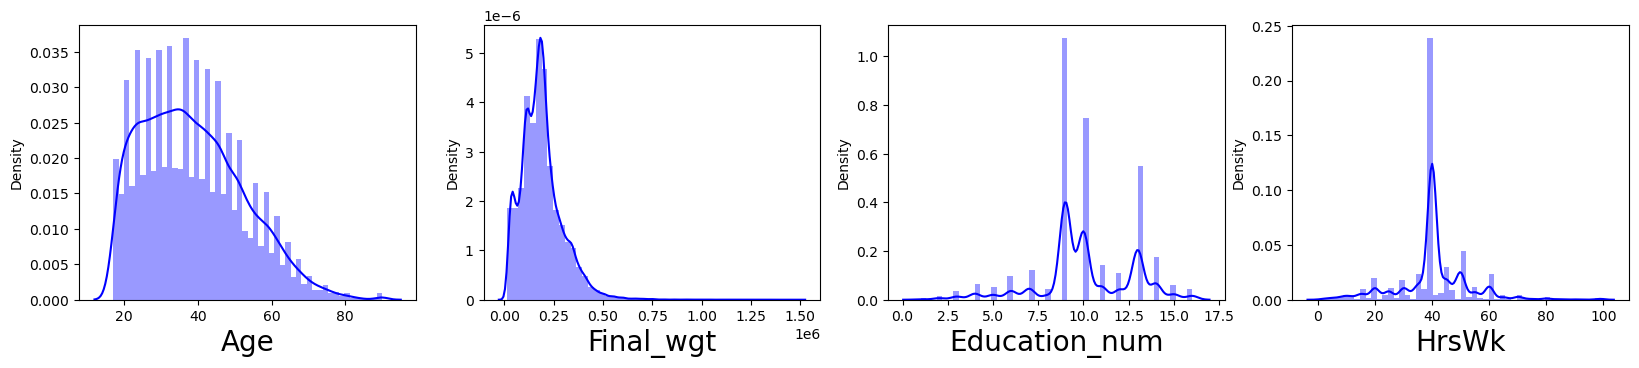

In [36]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

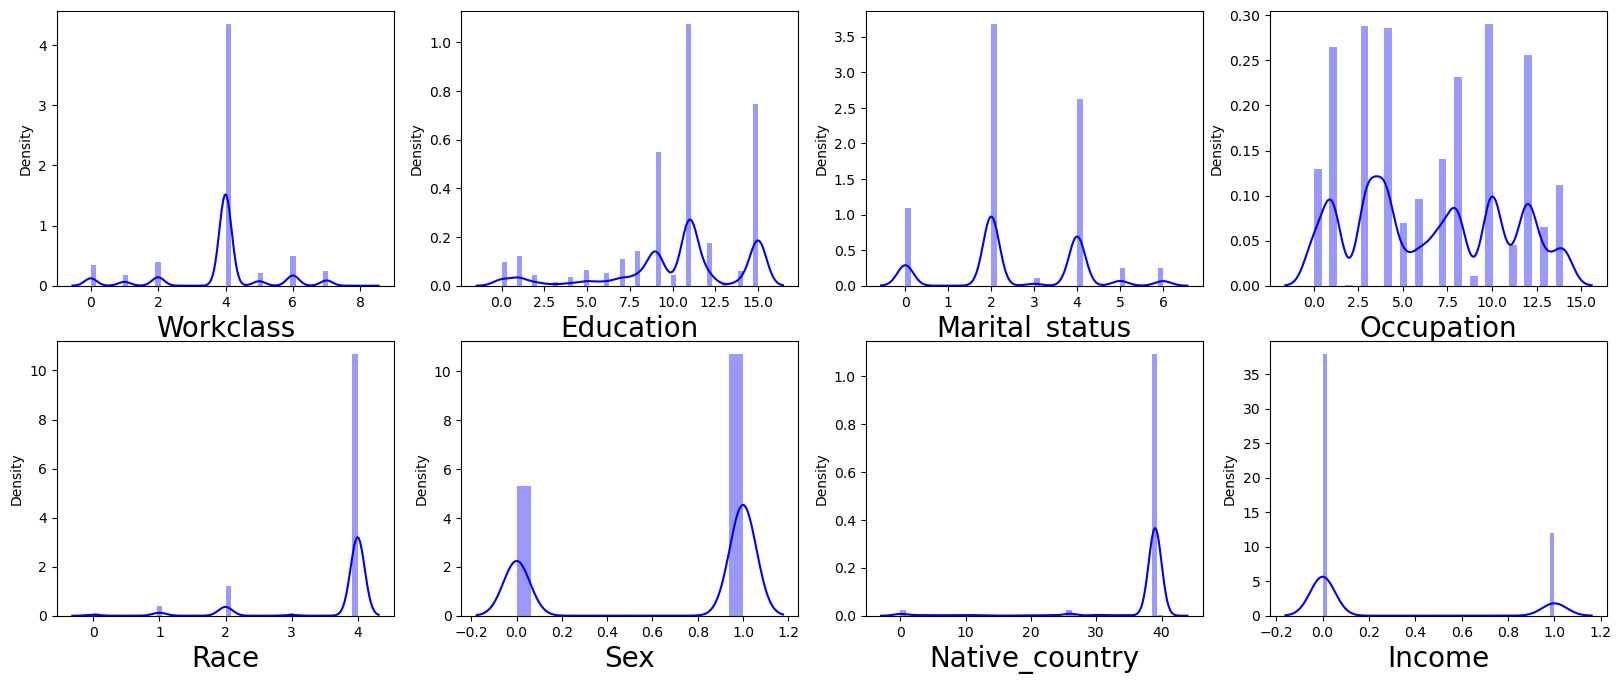

In [37]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in categorical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

In [38]:
df1.skew()

Age               0.557657
Workclass        -0.751854
Final_wgt         1.447695
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Race             -2.435283
Sex              -0.719400
HrsWk             0.228752
Native_country   -3.661060
Income            1.211640
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness Income 1.21 column skew in the left tail of the distribution. 

The skewness of Education_num, race, native country column is extreme lower than 0.5 , which indicate that skewness is on the right side. 

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

# Checking for outliers:

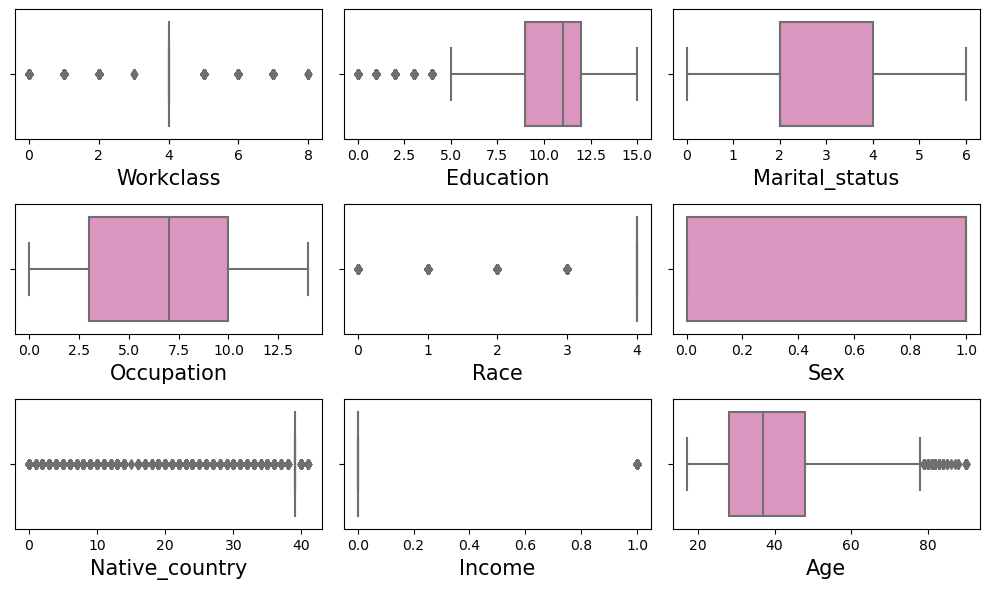

In [39]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in categorical_col:
    if plotnumber<=12:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


Z- score method

In [40]:
# Removing the outliers using zscore and IQR techniques before building the models and selected best one. 

from scipy.stats import zscore
out_features=df1[['Age','Final_wgt','Education_num','Native_country','Income','Race','Workclass']]
z=np.abs(zscore(out_features))
z


,Age,Final_wgt,Education_num,Native_country,Income,Race,Workclass
0,0.836961,1.008703,1.134817,0.291340,0.563389,0.393692,1.463505
1,0.042934,0.245008,0.420646,0.291340,0.563389,0.393692,0.090200
2,1.056935,0.425720,1.198377,0.291340,0.563389,1.962450,0.090200
3,0.776180,1.408036,1.134817,4.056085,0.563389,1.962450,0.090200
4,0.116259,0.898091,1.523683,0.291340,0.563389,0.393692,0.090200
...,...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.291340,0.563389,0.393692,0.090200
32556,0.103715,0.335469,0.420646,0.291340,1.774973,0.393692,0.090200
32557,1.423558,0.358812,0.420646,0.291340,0.563389,0.393692,0.090200
32558,1.216128,0.110897,0.420646,0.291340,0.563389,0.393692,0.090200


In [41]:
#threshold =3

np.where(z>3)

(array([    3,    10,    13, ..., 32508, 32526, 32528], dtype=int64),
 array([3, 5, 3, ..., 5, 5, 5], dtype=int64))

In [42]:
df2=df1[(z<3).all(axis=1)]
df2.shape


(29287, 12)

In [43]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 32536
new data frame 29287


In [44]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 9.985861814605359


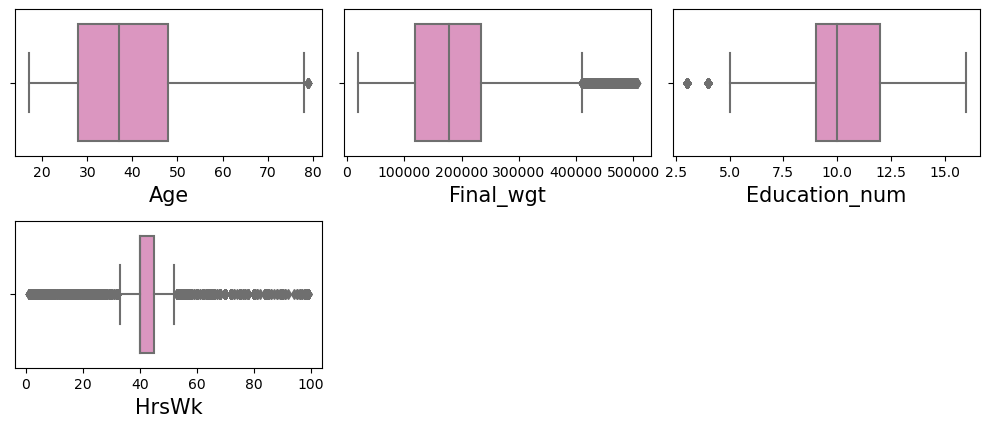

In [45]:
# Rechecking outlier

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

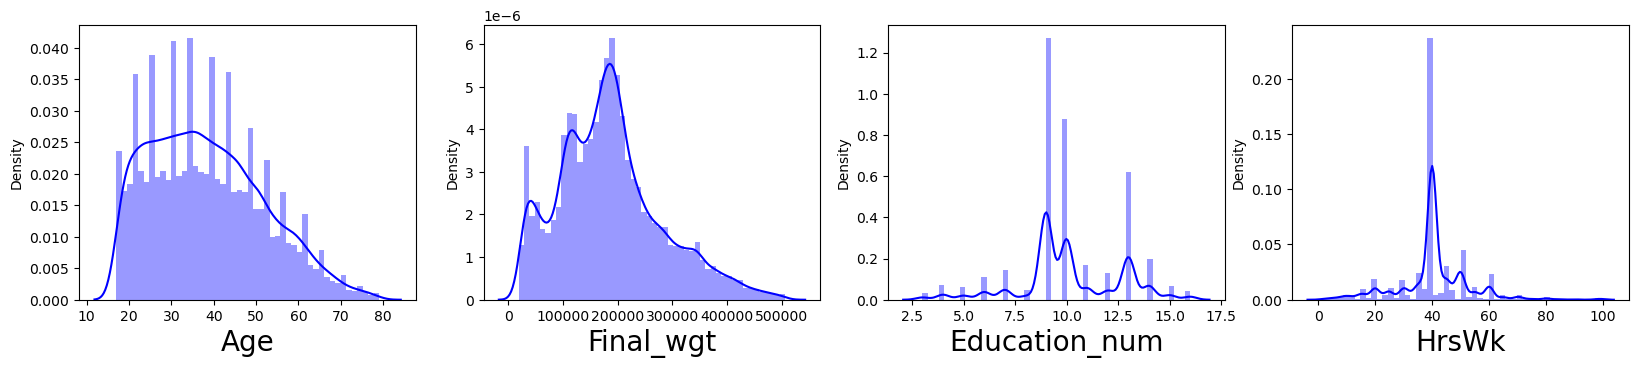

In [46]:
#checking skewness and if the data is distributed in each column normally

#Plotting feature variable column 

plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   

In [47]:
# we see many skewness in the data distributed in the graphs. 
df2.skew()

Age               0.467329
Workclass        -0.739431
Final_wgt         0.627328
Education        -0.965377
Education_num    -0.127964
Marital_status   -0.013984
Occupation        0.123378
Race             -2.637160
Sex              -0.719949
HrsWk             0.229039
Native_country   -5.596538
Income            1.195623
dtype: float64

In [48]:
#removing skewness using yeo- johnson method

Skew_data = ['Final_wgt','Race','Native_country','Income']

from sklearn.preprocessing import PowerTransformer

sk = PowerTransformer(method='yeo-johnson')
df2[Skew_data] = sk.fit_transform(df2[Skew_data].values)
df2[Skew_data].head()


,Final_wgt,Race,Native_country,Income
0,-1.120462,0.342569,0.168226,-0.567269
1,0.416971,0.342569,0.168226,-0.567269
2,0.596994,-2.921964,0.168226,-0.567269
4,1.038633,0.342569,0.168226,-0.567269
5,-0.152205,-2.921964,-4.417065,-0.567269


In [49]:
df2.corr()

,Age,Workclass,Final_wgt,Education,Education_num,Marital_status,Occupation,Race,Sex,HrsWk,Native_country,Income
Age,1.000000,0.007020,-0.071011,0.000635,0.055269,-0.282777,-0.016271,0.026808,0.093629,0.085120,0.031865,0.246751
Workclass,0.007020,1.000000,-0.022009,0.024934,0.052817,-0.066800,0.249455,0.065725,0.095748,0.136618,0.001647,0.049301
Final_wgt,-0.071011,-0.022009,1.000000,-0.023299,-0.034679,0.029431,0.001857,-0.104010,0.017020,-0.026918,-0.088459,-0.006195
Education,0.000635,0.024934,-0.023299,1.000000,0.343090,-0.039017,-0.021548,0.029572,-0.026863,0.057524,0.080034,0.074712
Education_num,0.055269,0.052817,-0.034679,0.343090,1.000000,-0.064215,0.114714,0.090779,0.009911,0.153265,0.135351,0.338477
Marital_status,-0.282777,-0.066800,0.029431,-0.039017,-0.064215,1.000000,-0.010106,-0.087205,-0.130342,-0.193435,-0.032628,-0.196774
Occupation,-0.016271,0.249455,0.001857,-0.021548,0.114714,-0.010106,1.000000,0.013606,0.080536,0.078050,0.008635,0.075446
Race,0.026808,0.065725,-0.104010,0.029572,0.090779,-0.087205,0.013606,1.000000,0.125041,0.060432,0.054407,0.097784
Sex,0.093629,0.095748,0.017020,-0.026863,0.009911,-0.130342,0.080536,0.125041,1.000000,0.234070,0.001166,0.217923
HrsWk,0.085120,0.136618,-0.026918,0.057524,0.153265,-0.193435,0.078050,0.060432,0.234070,1.000000,0.014685,0.231081


In [50]:
cor['Income'].sort_values

<bound method Series.sort_values of Age               0.234039
Workclass         0.051706
Final_wgt        -0.009521
Education         0.079361
Education_num     0.335299
Marital_status   -0.199187
Occupation        0.075398
Race              0.071855
Sex               0.215984
HrsWk             0.229659
Native_country    0.015623
Income            1.000000
Name: Income, dtype: float64>

In [51]:
#lets drop the less relevant columns Final_wgt and Native country

df2.drop(columns=['Final_wgt','Native_country'],axis=1,inplace=True)

In [52]:
#To check the classification we will save the data

class_df1=df2
class_df1.tail()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,HrsWk,Income
32555,27,4,7,12,2,13,0.342569,0,38,-0.567269
32556,40,4,11,9,2,7,0.342569,1,40,1.762831
32557,58,4,11,9,6,1,0.342569,0,40,-0.567269
32558,22,4,11,9,4,1,0.342569,1,20,-0.567269
32559,52,5,11,9,2,4,0.342569,0,40,1.762831


# Seperating features and label

In [53]:
#Seperating the independent and target variables into x and y

x = df2.drop("Income",axis=1)
y = df2['Income'].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (29287, 9)
Label Dimension (29287,)


# Feature Scaling using Standard Scalarization


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,HrsWk
0,0.862811,1.461615,-0.352986,1.180092,-0.394374,-0.606057,0.342569,0.702856,-2.233467
1,-0.031656,0.086621,0.166689,-0.459052,-1.719756,-0.134664,0.342569,0.702856,-0.041198
2,1.086427,0.086621,-2.431687,-1.278624,-0.394374,-0.134664,-2.921964,0.702856,-0.041198
3,-0.106195,0.086621,0.426527,1.589878,-0.394374,-0.606057,0.342569,-1.422767,-0.041198
4,0.788272,0.086621,-1.132499,-2.098196,0.268317,0.336729,-2.921964,-1.422767,-1.989882
...,...,...,...,...,...,...,...,...,...
29282,-0.851584,0.086621,-0.872661,0.770306,-0.394374,1.515210,0.342569,-1.422767,-0.203588
29283,0.117422,0.086621,0.166689,-0.459052,-0.394374,0.101032,0.342569,0.702856,-0.041198
29284,1.459122,0.086621,0.166689,-0.459052,2.256389,-1.313146,0.342569,-1.422767,-0.041198
29285,-1.224279,0.086621,0.166689,-0.459052,0.931007,-1.313146,0.342569,0.702856,-1.665101


# VIF to find multicolinearity


In [55]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif


,VIF values,Features
0,1.094669,Age
1,1.090495,Workclass
2,1.141238,Education
3,1.185447,Education_num
4,1.135868,Marital_status
5,1.089034,Occupation
6,1.031471,Race
7,1.092683,Sex
8,1.126421,HrsWk


In [56]:
y.value_counts()

0    22157
1     7130
Name: Income, dtype: int64

## Creating train test split
 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor as KNN


In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting


In [59]:
#Finding the best random state using Logistic Regression

maxAcc = 0
maxRS = 0

for i in range(200, 800):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max accuracy score is", maxAcc, "at random_state", maxRS)

Max accuracy score is 0.8168316831683168 at random_state 599


# Modeling


In [60]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8236599522021167
[[3974  434]
 [ 599  851]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4408
           1       0.66      0.59      0.62      1450

    accuracy                           0.82      5858
   macro avg       0.77      0.74      0.75      5858
weighted avg       0.82      0.82      0.82      5858



In [61]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.804028678729942
[[4129  279]
 [ 869  581]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4408
           1       0.68      0.40      0.50      1450

    accuracy                           0.80      5858
   macro avg       0.75      0.67      0.69      5858
weighted avg       0.79      0.80      0.79      5858



In [62]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8291225674291567
[[4178  230]
 [ 771  679]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4408
           1       0.75      0.47      0.58      1450

    accuracy                           0.83      5858
   macro avg       0.80      0.71      0.73      5858
weighted avg       0.82      0.83      0.81      5858



In [63]:
#Checking accuracy for Grandient classifiers

GB=GradientBoostingClassifier()

GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))



0.8513144417890065
[[4114  294]
 [ 577  873]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4408
           1       0.75      0.60      0.67      1450

    accuracy                           0.85      5858
   macro avg       0.81      0.77      0.79      5858
weighted avg       0.85      0.85      0.85      5858



In [64]:
#Checking accuracy for Bagging classifiers

BC=BaggingClassifier()

BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))



0.8088084670536019
[[3945  463]
 [ 657  793]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4408
           1       0.63      0.55      0.59      1450

    accuracy                           0.81      5858
   macro avg       0.74      0.72      0.73      5858
weighted avg       0.80      0.81      0.80      5858



#  Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [65]:
from sklearn.model_selection import cross_val_score


In [66]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,x,y)

print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())
print('Accuracy_Score:',accuracy_score(y_test,predRFC))
print('MAE:',mean_absolute_error(y_test, predRFC))
print('MSE:',mean_squared_error(y_test, predRFC))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFC)))


Difference between Accuracy score and cross validation score is - 0.007734667245462679
Accuracy_Score: 0.8236599522021167
MAE: 0.17634004779788323
MSE: 0.17634004779788323
RMSE: 0.4199286222655979


In [67]:
#Checking cv score for Logistic Regression

LR = LogisticRegression()

score = cross_val_score(LR, x, y, cv=5)
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())
print('Accuracy_Score:',accuracy_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

Difference between Accuracy score and cross validation score is - 0.0024442568364152484
Accuracy_Score: 0.804028678729942
MAE: 0.19597132127005804
MSE: 0.19597132127005804
RMSE: 0.44268648191474974


In [68]:
svc=SVC()
svc.fit(x_train,y_train)

# prediction

predsvc=svc.predict(x_test)
print('Accuracy_Score:',accuracy_score(y_test,predsvc))
print('MAE:',mean_absolute_error(y_test, predsvc))
print('MSE:',mean_squared_error(y_test, predsvc))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvc)))


Accuracy_Score: 0.8291225674291567
MAE: 0.17087743257084329
MSE: 0.17087743257084329
RMSE: 0.41337323639883033


In [69]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)

# prediction

predGB=GB.predict(x_test)
print('Accuracy_Score:',accuracy_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))


Accuracy_Score: 0.8513144417890065
MAE: 0.14868555821099352
MSE: 0.14868555821099352
RMSE: 0.38559766364825593


# Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [70]:
from sklearn.model_selection import GridSearchCV

# hyperparameters we are using is Gradient boosting classifier to tune our hyperparameters

GB = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 110, 150],  
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'random_state': [40]
}

# GridSearchCV object with the KNeighborsRegressor, the parameter grid, and cross-validation folds (cv)

grid = GridSearchCV(GB, param_grid, cv=5)


In [71]:
# Fitting our GridSearchCV Object
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 110, 150],
                         'random_state': [40], 'subsample': [0.8, 1.0]})

In [72]:
grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 50,
 'random_state': 40,
 'subsample': 1.0}

In [77]:
#Create a final model

Final_model =GradientBoostingClassifier()

Final_model.fit(x_train,y_train)

#predict the target variable using the test data
y_prediction= Final_model.predict(x_test)
y_prediction
acc = accuracy_score(y_test,pred)
print(acc*100)

80.4028678729942


# saving the model


In [74]:
import joblib
joblib.dump(Final_model,"Census_income.pkl")

['Census_income.pkl']

# Predicting the saved model


In [78]:
#Lets load the saved model and get the prediction

model = joblib.load("Census_income.pkl")

#Prediction

y_prediction = model.predict(x_test)
y_prediction


array([0, 0, 0, ..., 0, 1, 0])

In [79]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
5853,1,1
5854,0,0
5855,0,0
5856,1,0


# Final Analysis


This project has built a model that can predict a task to determine whether a person makes over $50K a year or not based on the census income data. The model can give better insight to the type of factors that can predict if a person can make over 50K by using machine learning model.

Many different classifiers were used in this project. Different ways of handling imbalance classes were tested out with these classifiers: model with hyperparameter tuning was used. 

Out of various classification algorithms, GradientBoostingClassifier display the most balanced performance to predict income over 50K

The Grandient Boosting classifier learn the best model giving accuracy:

Accuracy_Score: 0.8513144417890065

MAE: 0.14868555821099352

MSE: 0.14868555821099352

RMSE: 0.38559766364825593

Final model give accuracy of 80.4%

Thank you!